In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickers = ['MA', 'PEP']
closes = yf.download(tickers, start='2022-03-10', end='2025-03-10')['Close']
closes.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Ticker,MA,PEP
Date,,
2022-03-10,318.846191,142.677536
2022-03-11,319.042633,141.957291
2022-03-14,322.775391,143.951889
2022-03-15,329.071960,146.823730
2022-03-16,338.580658,147.470139


# a. Calcula los rendimientos medios diarios por acción e interprétalos 5pt.

In [3]:
ret = closes.pct_change().dropna()
ret.mean()*100

Ticker
MA     0.081236
PEP    0.016617
dtype: float64

### Interpretación:

+ Los rendimientos indican que en promedio Mastercard incrementa un 0.0812% su precio y Pepsi un 0.0167.
+ Además, al ser positivos podemos intuir que la tendencia de ambos va hacia la alza.

# b. Calcula la matriz de covarianza de los rendimientos e interprétala 5 pt.

In [4]:
cov = ret.cov()
cov

Ticker,MA,PEP
Ticker,,
MA,0.000186,0.000053
PEP,0.000053,0.000121


### Interpretación:

+ Numéricamente la matriz de covarianza es complicada de interpretar, sin embargo, nos sirve para ver el signo y darnos cuenta si los activos están correlacionados positiva o negativamente.

+ En este caso, están correlacionados positivamente.

# c. Estima mil escenarios del valor final del portafolio 30 días después y obtén los valores del portafolio en el peor y en el mejor resultado de tu simulación. 5 pt.

In [5]:
returns = closes.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

def simular_precios(mean_returns, matriz_cov, num_dias, N, weights, initial_value):
    portfolio_return = mean_returns.dot(weights)

    portfolio_simulated_returns = np.zeros((num_dias, N))
    mean_returns_vector = np.full((num_dias, len(mean_returns)), portfolio_return)

    for m in range(N):
        L = np.linalg.cholesky(matriz_cov)
        Z = np.random.normal(size=(num_dias, len(mean_returns)))  # Matriz de n_dias x num activos

        daily_returns = mean_returns_vector + L.dot(Z.T).T
        portfolio_simulated_returns[:, m] = np.cumprod(1 + np.dot(daily_returns, weights)) - 1

    portfolio_values = initial_value * (1 + portfolio_simulated_returns)
    return portfolio_simulated_returns, portfolio_values

weights = np.array([0.5, 0.5])
num_dias = 30 
N = 1000 
initial_value = 10000 

portfolio_simulated_returns, portfolio_values = simular_precios(mean_returns, cov_matrix, num_dias, N, weights, initial_value)

valores_finales = portfolio_values[-1, :]

peor = valores_finales.min()
mejor = valores_finales.max()

print(f"Peor caso: ${peor:.2f}")
print(f"Mejor caso: ${mejor:.2f}")

Peor caso: $8311.37
Mejor caso: $12083.15


# d. Estima el Value at Risk (VaR) a 30 días al 1% para el portafolio especificado e interpreta el VaR resultante. 10 pt


In [6]:
var = np.percentile(valores_finales, 1)
var

8949.877647095007

El VaR obtenido significa que la máxima pérdida esperada de nuestro portafolio dentro de 30 días es de 8803.53

# e. Haz un histograma con los 1000 valores finales del portafolio (los 1000 valores en el día 30). 10 pts. Carga el código utilizado con las preguntas contestadas

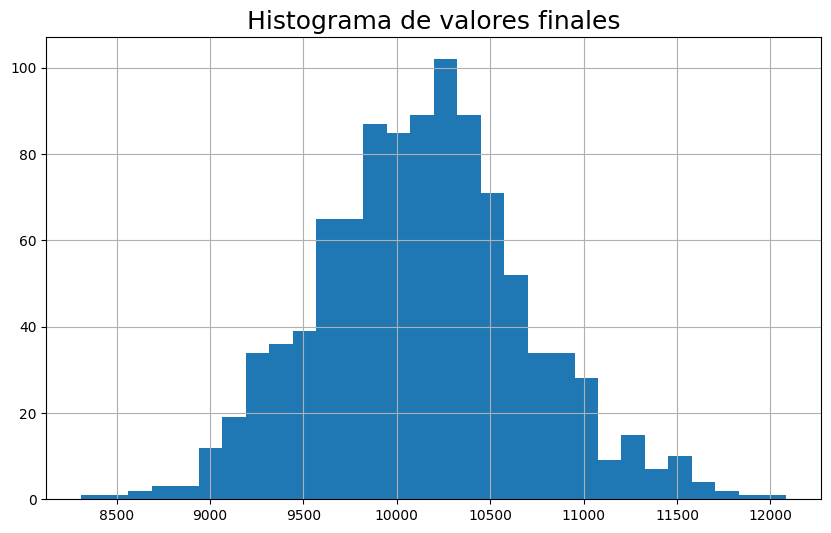

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Histograma de valores finales', fontsize=18)
plt.hist(valores_finales, bins=30)
plt.grid()
plt.show()